In [2]:
import pandas as pd # pandas is used to load and manipulate data and for one hot encoding
import numpy as np # data manipulation
import matplotlib.pyplot as plt # matplotlib is for drawing graphs

In [3]:
df = pd.read_csv('Overview.csv')

In [4]:
df.head()

,DeviceTimeStamp,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A
0,2019-06-25T13:06,0,0,0,37,0,0,0
1,2019-06-25T13:09,0,0,0,37,0,0,0
2,2019-06-27T10:49,0,0,0,38,0,0,0
3,2019-06-27T10:51,0,0,0,38,0,0,0
4,2019-06-27T10:52,0,0,0,39,0,0,0


In [5]:
df.drop('DeviceTimeStamp', axis=1, inplace = True) ## set axis = 0 to remove rows, axis = 1 to remove colums
df.head()

,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A
0,0,0,0,37,0,0,0
1,0,0,0,37,0,0,0
2,0,0,0,38,0,0,0
3,0,0,0,38,0,0,0
4,0,0,0,39,0,0,0


In [6]:
X = df.drop('OTI_T', axis=1).copy() # alternatively: X = df_no_missing.iloc[:,:-1].copy
X.head()

,OTI,WTI,ATI,OLI,OTI_A,MOG_A
0,0,0,0,37,0,0
1,0,0,0,37,0,0
2,0,0,0,38,0,0
3,0,0,0,38,0,0
4,0,0,0,39,0,0


In [7]:
y = df['OTI_T'].copy()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: OTI_T, dtype: int64

In [9]:
# seperating the input part and output
"""X = wine.data
y = wine.target
features = wine.feature_names
print(len(features))"""

'X = wine.data\ny = wine.target\nfeatures = wine.feature_names\nprint(len(features))'

In [8]:
"""import seaborn as sns
import matplotlib.pyplot as plt
for i in range(13):
    sns.boxplot(x=y, y=X[:, i])
    plt.ylabel(features[i])
    plt.show()"""

'import seaborn as sns\nimport matplotlib.pyplot as plt\nfor i in range(13):\n    sns.boxplot(x=y, y=X[:, i])\n    plt.ylabel(features[i])\n    plt.show()'

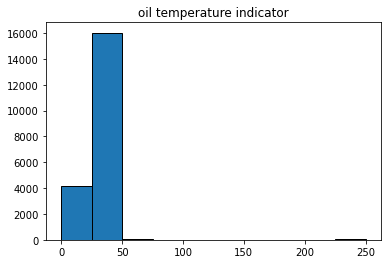

In [10]:
plt.hist(X['OTI'], edgecolor = 'black')
plt.title('oil temperature indicator')
plt.show()

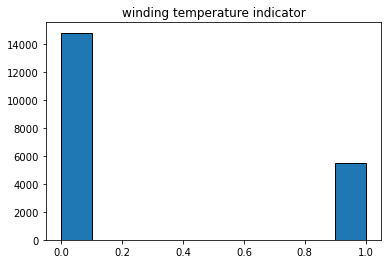

In [11]:
plt.hist(X['WTI'], edgecolor = 'black')
plt.title('winding temperature indicator')
plt.show()

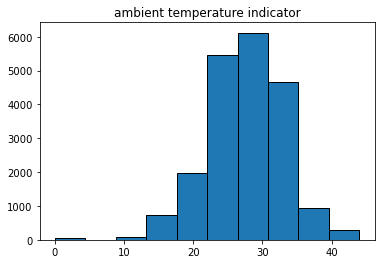

In [12]:
plt.hist(X['ATI'], edgecolor = 'black')
plt.title('ambient temperature indicator')
plt.show()

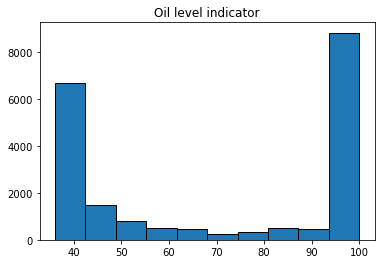

In [13]:
plt.hist(X['OLI'], edgecolor = 'black')
plt.title('Oil level indicator')
plt.show()

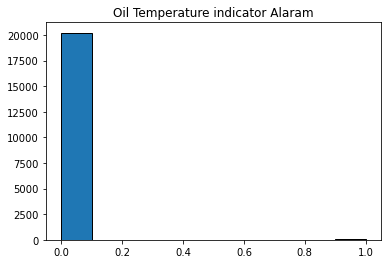

In [14]:
plt.hist(X['OTI_A'], edgecolor = 'black')
plt.title('Oil Temperature indicator Alaram')
plt.show()

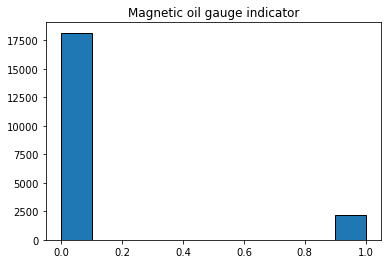

In [15]:
plt.hist(X['MOG_A'], edgecolor = 'black')
plt.title('Magnetic oil gauge indicator')
plt.show()

In [19]:
# this will be our target which is output which we are going to predict
target_name = df['OTI_T'].copy()
print(target_name)

0        0
1        0
2        0
3        0
4        0
        ..
20311    0
20312    0
20313    0
20314    0
20315    0
Name: OTI_T, Length: 20316, dtype: int64


In [20]:
# now we are spliting the datasets into training and testing sets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 32)

In [21]:
model = SVC()
model.fit(X_train, y_train)
print("Accuracy on the testing data is ", model.score(X_test, y_test))
print("Accuracy on the training data is ", model.score(X_train, y_train))

Accuracy on the testing data is  1.0
Accuracy on the training data is  1.0


In [22]:
# kernel for SVM
kernel = ['linear','rbf','poly','sigmoid']
for i in kernel:
    model = SVC(kernel = i, C = 1.0)
    model.fit(X_train, y_train)
    print('for kernel:', i)
    print("Accuracy is:", model.score(X_test, y_test))

for kernel: linear
Accuracy is: 1.0
for kernel: rbf
Accuracy is: 1.0
for kernel: poly
Accuracy is: 1.0
for kernel: sigmoid
Accuracy is: 0.9973748974569319


In [23]:
# for kernel polynomial degree we use degree in range from 1 to 10
for i in range(1, 10):
    model = SVC(kernel = 'poly', degree = i, C = 100)
    model.fit(X_train, y_train)
    print('Accuracy on the testing data: \t', model.score(X_test, y_test))
    print('Accuracy on the training data: \t', model.score(X_train, y_train))

Accuracy on the testing data: 	 1.0
Accuracy on the training data: 	 1.0
Accuracy on the testing data: 	 1.0
Accuracy on the training data: 	 1.0
Accuracy on the testing data: 	 1.0
Accuracy on the training data: 	 1.0
Accuracy on the testing data: 	 1.0
Accuracy on the training data: 	 1.0
Accuracy on the testing data: 	 1.0
Accuracy on the training data: 	 1.0
Accuracy on the testing data: 	 1.0
Accuracy on the training data: 	 1.0
Accuracy on the testing data: 	 1.0
Accuracy on the training data: 	 1.0
Accuracy on the testing data: 	 1.0
Accuracy on the training data: 	 1.0
Accuracy on the testing data: 	 1.0
Accuracy on the training data: 	 1.0


# hyperparameter tunining

In [24]:
# which will compute all the hidden parameters used for tuining the kernel
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1, 1, 100, 1000], 'kernel':['rbf','poly','sigmoid','linear'],'degree':[1,2,3,4,5,6]}
grid = GridSearchCV(SVC(), param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 100, 1000], 'degree': [1, 2, 3, 4, 5, 6],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

In [25]:
print(grid.best_params_)
print(grid.score(X_test, y_test))

{'C': 0.1, 'degree': 1, 'kernel': 'rbf'}
1.0
